# Julia set

In [1]:
import io
import imageio

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

Julia map:
$$z_{n+1} = z_n^2 + C$$

In [2]:
def julia_map(z, C):
    return z**2 + C

In [3]:
def plot_the_evolution(num_steps, Re_z0=0.5, Im_z0=0.5, C=0):
    z = np.zeros(num_steps, dtype=complex)
    z[0] = Re_z0 + Im_z0 * 1j

    for step in range(num_steps - 1):
        z[step + 1] = julia_map(z[step], C)

    plt.figure(figsize=(12, 4))
    plt.plot(z.real, label='Re(z)')
    plt.plot(z.imag, label='Im(z)')

    plt.title(f'The evolution of z. {C=} {Re_z0=} {Im_z0=}')
    plt.legend()
    plt.xlabel('step')
    plt.ylabel('value')

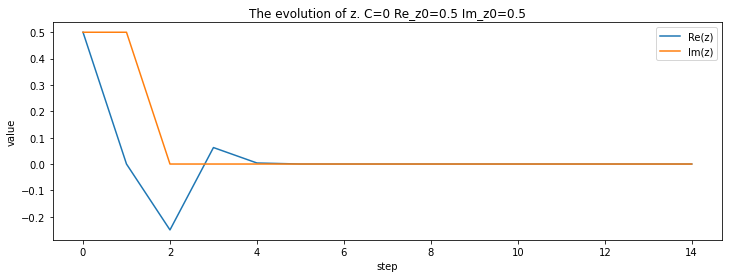

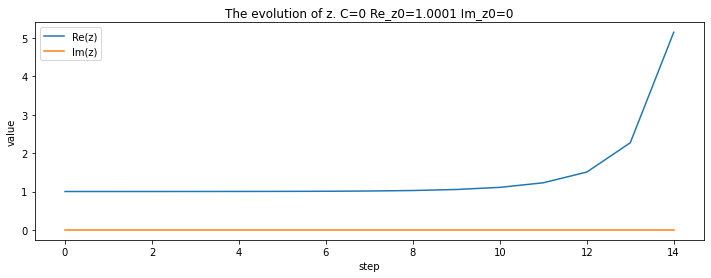

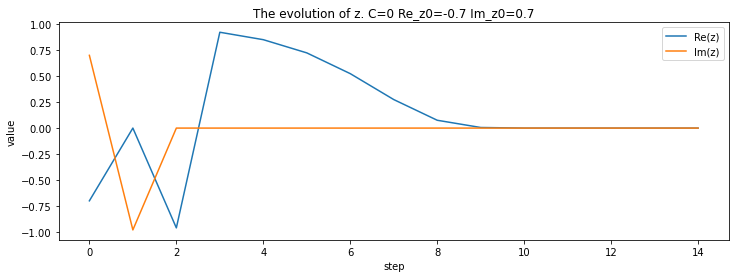

In [4]:
plot_the_evolution(num_steps=15, Re_z0=0.5, Im_z0=0.5)
plot_the_evolution(num_steps=15, Re_z0=1.0001, Im_z0=0)
plot_the_evolution(num_steps=15, Re_z0=-0.7, Im_z0=0.7)

In [5]:
def get_julia_set(Re_values, Im_values, C=0, num_steps=100, limit=100):
    z_matrix = Re_values + np.expand_dims(Im_values, 1) * 1j
    julia = np.zeros_like(z_matrix, dtype=int)

    for _ in range(num_steps):
        indexes = np.abs(z_matrix) < limit
        z_matrix[indexes] = julia_map(z_matrix[indexes], C)
        julia[np.abs(z_matrix) > limit] += 1

    return julia


def plot_julia(julia, extent, title, cmap='gnuplot2'):
    plt.figure(figsize=(14, 11))

    plt.imshow(julia, cmap=cmap, extent=extent)

    plt.title(title, fontsize=20)
    plt.xlabel('Re(z)', fontsize=20)
    plt.ylabel('Im(z)', fontsize=20)
    plt.tick_params(labelsize=20)

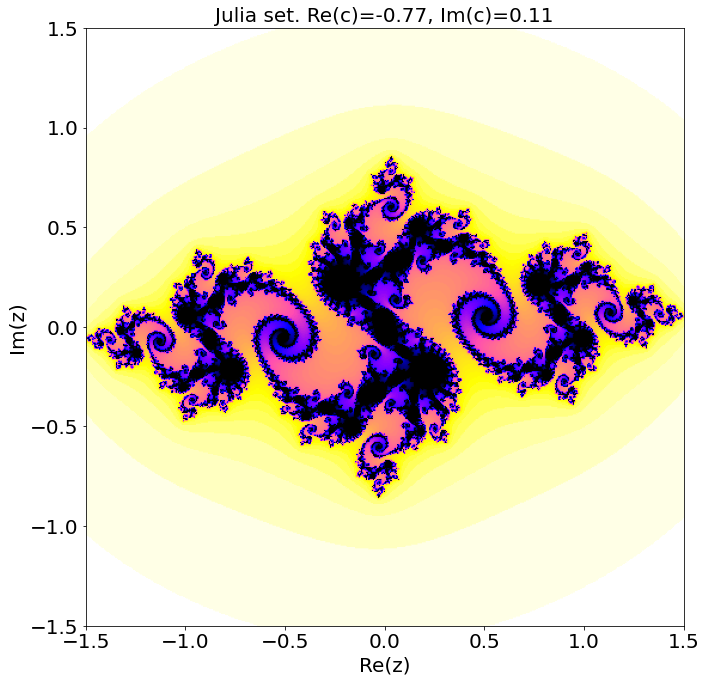

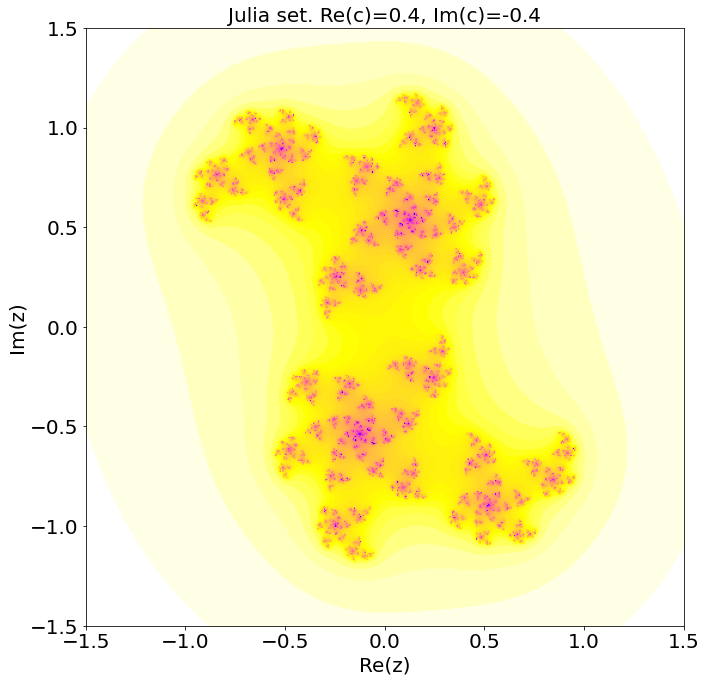

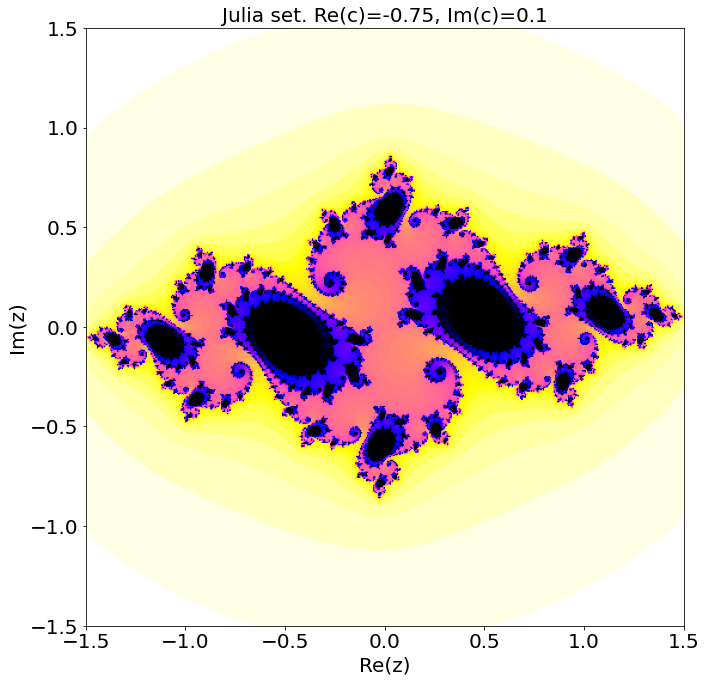

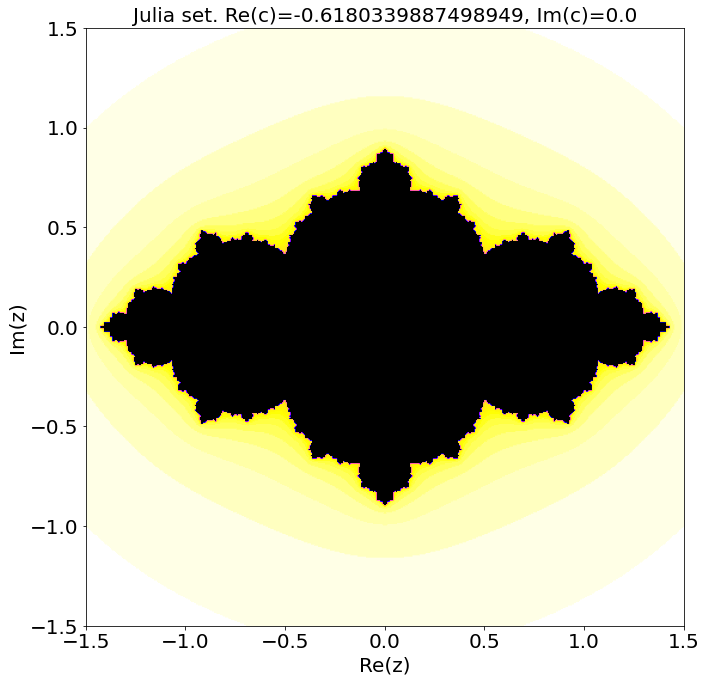

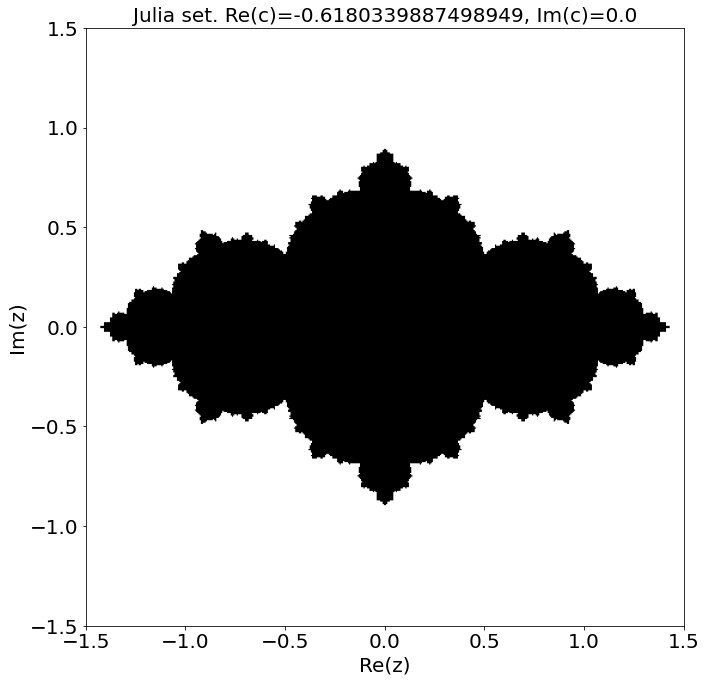

In [6]:
min_val = -1.5
max_val = 1.5
num_of_values = 500
Re_values = np.linspace(min_val, max_val, num_of_values)
Im_values = np.linspace(min_val, max_val, num_of_values)

golden_ratio = (1 + np.sqrt(5)) / 2
for C in (-0.77+0.11j, 0.4-0.4j, -0.75+0.1j, 1-golden_ratio):
    julia = get_julia_set(Re_values, Im_values, C)
    plot_julia(julia, (min_val, max_val, min_val, max_val),
               title='Julia set. Re(c)={}, Im(c)={}'.format(C.real, C.imag))

plot_julia(julia == 0, (min_val, max_val, min_val, max_val),
           title='Julia set. Re(c)={}, Im(c)={}'.format(C.real, C.imag),
           cmap='binary')

In [7]:
num_frames = 400
num_seconds = 20

Re = Im = np.linspace(-2, 2, 500)

a_arr = np.linspace(0, 2*np.pi, num_frames)
c_arr = np.exp(a_arr * 1j)

images = []
for i, (a, c) in enumerate(zip(a_arr, c_arr)):
    print(f'\r{i+1}/{len(c_arr)}', end='')

    frame = get_julia_set(Re, Im, C=c)

    buf = io.BytesIO()
    plt.figure(figsize=(10, 10))
    plot_julia(frame, (min(Re), max(Re), min(Im), max(Im)),
               title=f'Julia set, c=exp(i * a), {a=}')
    plt.savefig(buf, format="png")
    plt.close('all')
    buf.seek(0)
    images.append(Image.open(buf))

imageio.mimsave('images/task_02/julia.gif', images, fps=num_frames/num_seconds)

400/400

![Gif](images/task_02/julia.gif)